In [1]:
import pandas as pd
import numpy as np
from scipy import linalg
import sys
sys.path.append("..")
import os
from qkids import Week
from qkids.DatabasePool import get_schedule_connection
from schedule.GBDT import prepare_data
import matplotlib.pyplot as plt
from odps import ODPS
odps = ODPS('LTAItDVDpC9aEMXJ', 'U6iEFCZCzoPUbjou1FW45SQruxIfFt', 'Qkids_V2')
from sklearn.linear_model import LinearRegression

In [2]:
historical_data = prepare_data()

# 查看数据

In [4]:
historical_data_chapter = historical_data[['begin','cnt']].groupby('begin').sum().reset_index()
historical_data_chapter['time'] = historical_data_chapter.begin.apply(lambda x:x.time())

### 查看不同时间点的数据情况

In [7]:
historical_data_chapter[['time','cnt']].groupby(['time']).describe()

cnt                                                              \
          count         mean          std     min      25%     50%      75%   
time                                                                          
08:30:00  343.0  2317.842566  1015.106729   408.0  1535.50  2229.0  3243.50   
09:10:00  350.0  2469.848571  1158.633687   101.0  1562.75  2316.0  3565.75   
09:50:00  351.0  2400.735043  1120.120170   102.0  1562.00  2260.0  3453.00   
10:30:00  343.0  2065.032070   915.837103   465.0  1330.00  1966.0  2873.50   
11:10:00  343.0  1621.877551   651.011554   472.0  1143.50  1623.0  2053.00   
17:50:00    3.0  1292.666667   180.694032  1085.0  1232.00  1379.0  1396.50   
18:30:00  741.0  3100.659919  1452.370375   685.0  2028.00  2811.0  3805.00   
19:10:00  742.0  3971.545822  1717.047816  1073.0  2675.75  3692.0  4920.75   
19:50:00  741.0  4447.557355  1809.142151  1217.0  3136.00  4131.0  5356.00   
20:30:00  740.0  3925.078378  1745.917811   120.0  2714.50  3488.0  4840.50   

                   
              max  
time               
08:30:00   4685.0  
09:10:00   5125.0  
09:50:00   5007.0  
10:30:00   4984.0  
11:10:00   3708.0  
17:50:00   1414.0  
18:30:00   8448.0  
19:10:00  10114.0  
19:50:00  10263.0  
20:30:00   9375.0

### 查看一年中不通周的数据情况

In [8]:
historical_data[['weekofyear','cnt']].groupby(['weekofyear']).describe()

cnt                                                       
              count       mean         std  min   25%   50%    75%     max
weekofyear                                                                
1            6532.0  41.639927   91.169777  1.0   7.0  18.0  48.00  1819.0
2            6663.0  45.593276  102.600382  1.0   7.0  20.0  53.00  2419.0
3            7586.0  53.835355   80.595808  1.0  11.0  28.0  66.00  1328.0
4            8212.0  53.702752   80.933388  1.0  10.0  27.0  66.00  1161.0
5           10306.0  55.656705   77.953506  1.0  12.0  30.0  72.00  1242.0
6            3862.0  57.097100   77.833911  1.0  12.0  29.0  72.00   832.0
7            5506.0  61.459862   84.408655  1.0  15.0  35.0  75.00   899.0
8            4327.0  73.667668  107.942848  1.0  16.0  35.0  92.00  1134.0
9            4173.0  81.351306  121.141753  1.0  15.0  35.0  97.00   947.0
10           4157.0  52.537407   71.615460  1.0  10.0  25.0  70.00   753.0
11           4252.0  44.868062   57.915019  1.0   9.0  21.0  60.00   459.0
12           4297.0  42.834303   53.359638  1.0   9.0  21.0  59.00   429.0
13           4453.0  42.829104   54.109571  1.0   9.0  22.0  58.00   503.0
14           4341.0  42.553098   49.665297  1.0   9.0  23.0  59.00   371.0
15           4689.0  38.437193   47.726297  1.0   8.0  20.0  51.00   410.0
16           4685.0  37.422625   46.494569  1.0   8.0  19.0  51.00   387.0
17           4146.0  38.916787   47.237072  1.0   8.0  20.0  54.00   404.0
18           4216.0  37.030361   41.733613  1.0   8.0  21.0  53.00   323.0
19           4639.0  36.960121   47.036739  1.0   7.0  19.0  48.00   382.0
20           4674.0  37.063543   46.324404  1.0   7.0  19.0  50.00   399.0
21           4795.0  34.704692   43.231175  1.0   7.0  18.0  47.00   399.0
22           4750.0  35.430737   55.717481  1.0   7.0  17.0  45.00   677.0
23           4899.0  37.738722   61.475700  1.0   6.0  17.0  46.00   650.0
24           4916.0  35.495321   68.334467  1.0   5.0  14.0  40.00   951.0
25           5048.0  40.074089   70.360182  1.0   6.0  17.0  47.00   839.0
26           6350.0  42.673386   68.835114  1.0   8.0  20.0  50.00   826.0
27           8029.0  45.541786   93.960880  1.0   8.0  19.0  44.00  1329.0
28           8335.0  52.554049  110.059395  1.0   8.0  21.0  51.00  1535.0
29           8463.0  59.321399  124.346158  1.0   9.0  24.0  57.00  1649.0
30           8583.0  66.649656  141.546067  1.0  10.0  27.0  62.00  1893.0
31           8606.0  62.732512  111.009726  1.0  11.0  28.0  65.00  1379.0
32           8723.0  62.387596  107.680620  1.0  11.0  28.0  66.00  1111.0
33           8820.0  64.118707  110.924815  1.0  11.0  29.0  67.00  1123.0
34           8917.0  65.168218  112.738152  1.0  12.0  30.0  68.00  1266.0
35           8949.0  63.322047  111.094041  1.0  11.0  29.0  67.00  1242.0
36           5377.0  52.964850   83.071882  1.0  10.0  24.0  65.00   981.0
37           5495.0  54.221292   90.915592  1.0  10.0  24.0  66.00  1167.0
38           5581.0  50.548468   86.358223  1.0   9.0  23.0  61.00  1175.0
39           4557.0  57.966206   93.183357  1.0  12.0  27.0  72.00  1069.0
40           4101.0  54.173129   70.385543  1.0  15.0  29.0  74.00   943.0
41           5197.0  46.084472   69.536074  1.0   9.0  21.0  56.00   767.0
42           5629.0  43.675431   66.040462  1.0   8.0  20.0  53.00   838.0
43           5631.0  40.699521   59.796418  1.0   8.0  18.0  50.00   748.0
44           5525.0  38.031493   56.241927  1.0   7.0  17.0  46.00   684.0
45           5501.0  39.734594   59.023019  1.0   7.0  18.0  48.00   668.0
46           5509.0  42.416773   76.660511  1.0   7.0  18.0  48.00  1134.0
47           5442.0  40.677325   75.631857  1.0   7.0  18.0  45.00  1164.0
48           5457.0  41.581455   85.397166  1.0   7.0  18.0  46.00  1424.0
49           5531.0  46.972519   91.213447  1.0   8.0  20.0  51.00  1418.0
50           5561.0  48.745909   95.591244  1.0   7.0  19.0  52.00  1526.0
51           5692.0  43.872628   90.26290

### 按天计算总人数

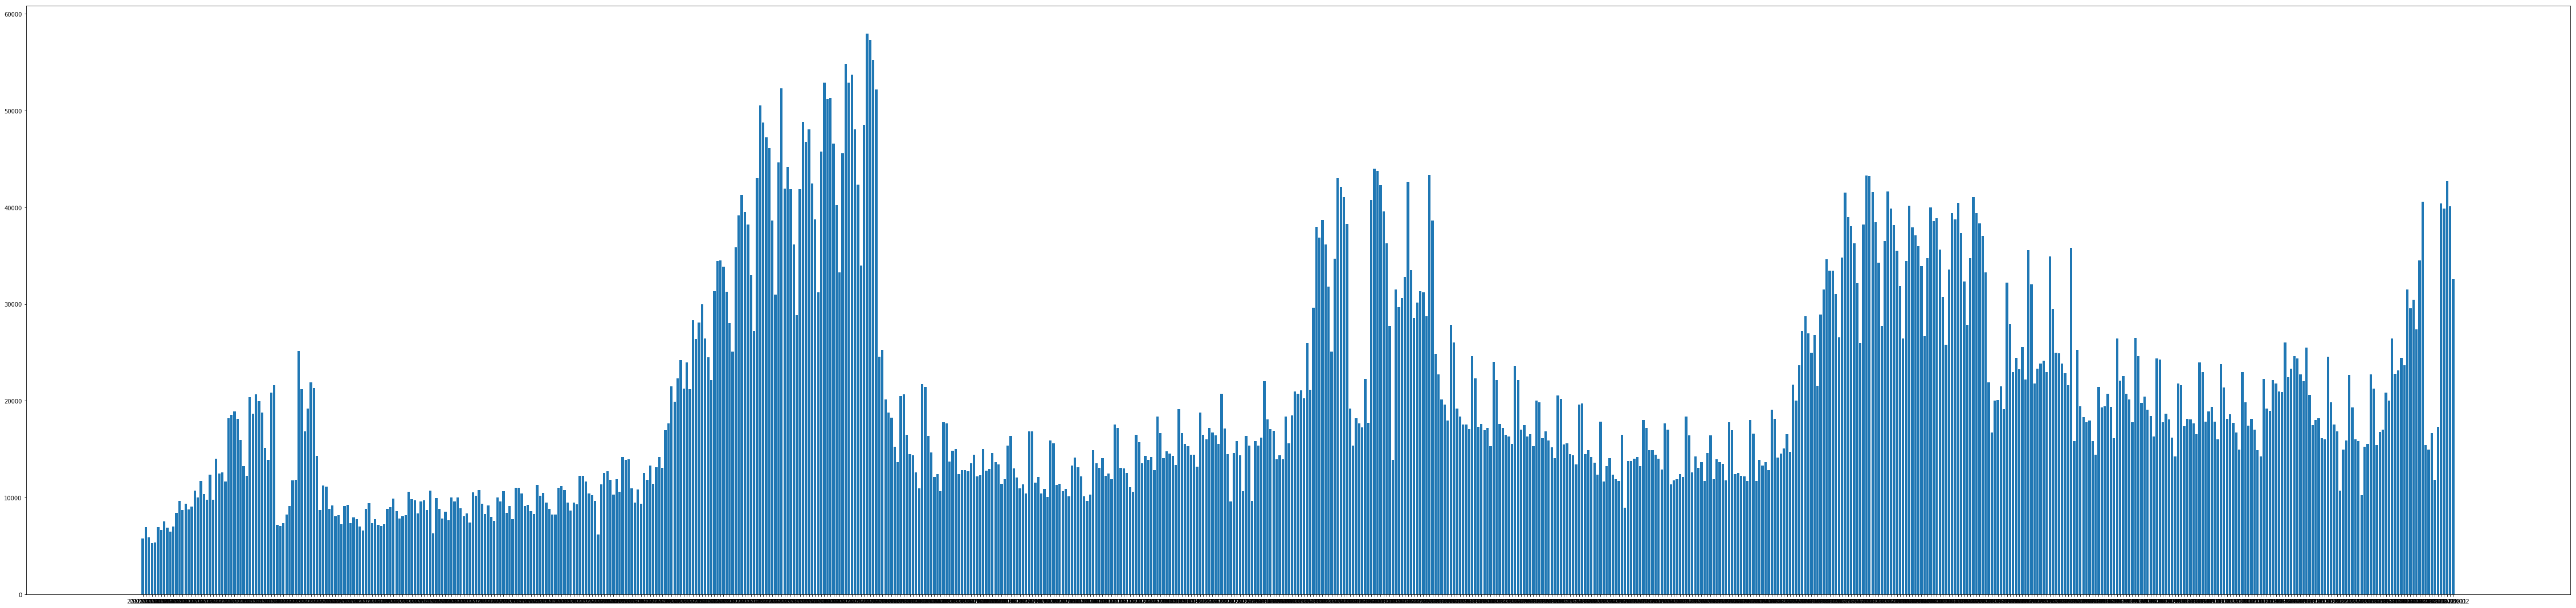

In [10]:
historical_data_cnt =  historical_data[['date', 'cnt']].groupby('date').sum()
fig = plt.figure(0,figsize=(80, 19))
ax = fig.add_subplot(1,1,1)
ax.bar(historical_data_cnt.index, historical_data_cnt.cnt.values)
fig.show()

# 模型

In [3]:
# 交叉验证
def split_data(data,frac = 0.2):
    return np.split(data.sample(frac=1), [int(frac*len(data))])

### GradientBoostingRegressor

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [5]:
# 整理数据
week = Week()
time_index = [ i.strftime("%H:%M") for i in week.day_times]
historical_data['time_index'] = historical_data.time.apply(lambda x: time_index.index(x))

In [6]:
test, train = split_data(historical_data)
x_train = train[['chapter', 'time_index', 'day', 'dayofweek', 'dayofyear', 'week','weekofyear']].values
y_train = train.cnt.values
x_test = test[['chapter', 'time_index', 'day', 'dayofweek', 'dayofyear', 'week','weekofyear']].values
y_test = test.cnt.values

est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
    max_depth=6, random_state=12, loss='ls').fit(x_train, y_train)

mean_squared_error(y_test, est.predict(x_test))

1508.9136187626084

In [7]:
preict_data = est.predict(historical_data[['chapter', 'time_index', 'day', 'dayofweek', 'dayofyear', 'week','weekofyear']].values)

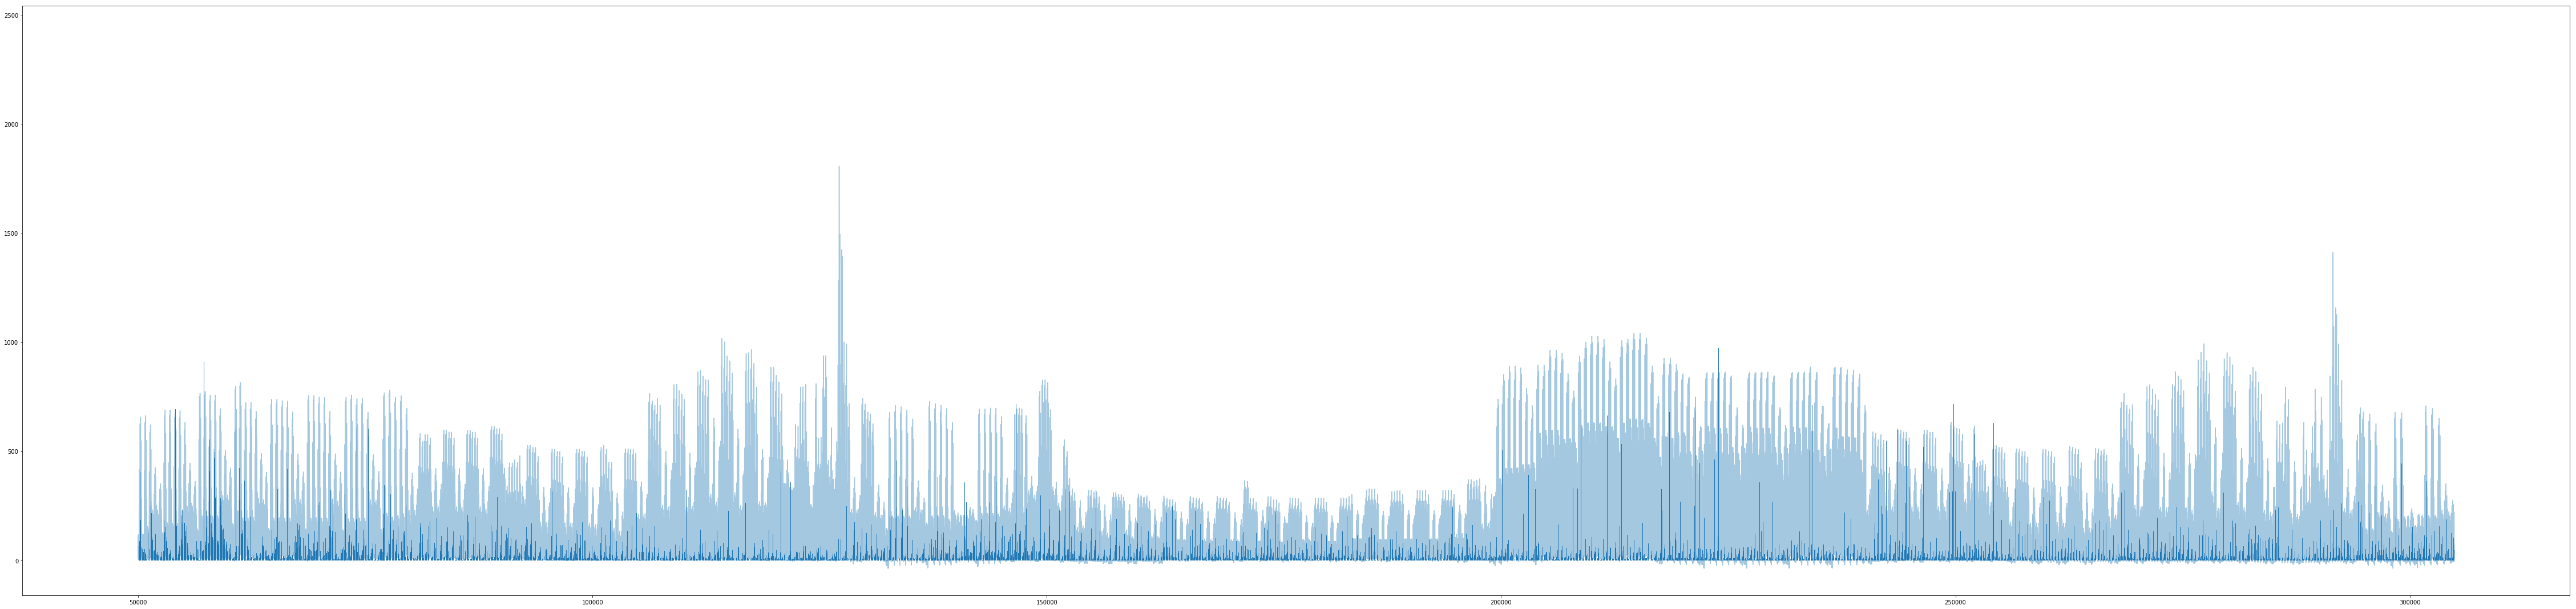

In [8]:
fig, ax = plt.subplots(figsize=(80, 19))
sub = 50000
ax.bar(historical_data.index[sub:], historical_data.cnt.values[sub:])
ax.errorbar(historical_data.index[sub:], preict_data[sub:], alpha=0.4)
plt.show()